In [1]:
from universal_datagen.generator.generator_text import AM2018TxtGenerator
from universal_datagen.generator.generator_mixed import AM2018MixedGenerator
import tensorflow as tf
import keras
from keras.callbacks import *
from keras.models import model_from_json, Model
from keras.layers import Input

from utils import *
import glob

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [15]:
abstract_dir = 'output/lstm_shallow/sequence/labeled/448x448_abstr/'
with open(abstract_dir + 'param.json', 'r') as f:
    param_dict = json.loads(f.read())
    ih = param_dict['dataset_input_height']
    iw = param_dict['dataset_input_width']
    ic = param_dict['dataset_input_channels']
    icl = param_dict['dataset_num_classes']

classify_dir = 'output/lstm_shallow/sequence/labeled/448x448_class/'
with open(classify_dir + 'param.json', 'r') as f:
    param_dict = json.loads(f.read())
    lh = param_dict['dataset_input_height']
    lw = param_dict['dataset_input_width']
    lc = param_dict['dataset_input_channels']
    lcl = param_dict['dataset_num_classes']

In [16]:
with open(abstract_dir + '/model.json', 'r') as f:
    abstract_model = model_from_json(f.read())

weights = glob.glob(abstract_dir + "weights*.hdf5")
abstract_model.load_weights(sorted(weights)[-1])

new_input = Input(shape=(1, ih, iw, ic)) # time step of 1       
abstract_model.layers.pop(0)
new_output = abstract_model(new_input)

abstract_model = Model(new_input, new_output)

In [18]:
with open(classify_dir + 'model.json', 'r') as f:
    classify_model = model_from_json(f.read())

weights = glob.glob(classify_dir + "weights*.hdf5")
classify_model.load_weights(sorted(weights)[-1])

new_input = Input(shape=(1, lh, lw, lc)) # time step of 1
classify_model.layers.pop(0)
new_output = classify_model(new_input)

classify_model = Model(new_input, new_output)

# Abstraction Model

<Figure size 2880x2160 with 0 Axes>

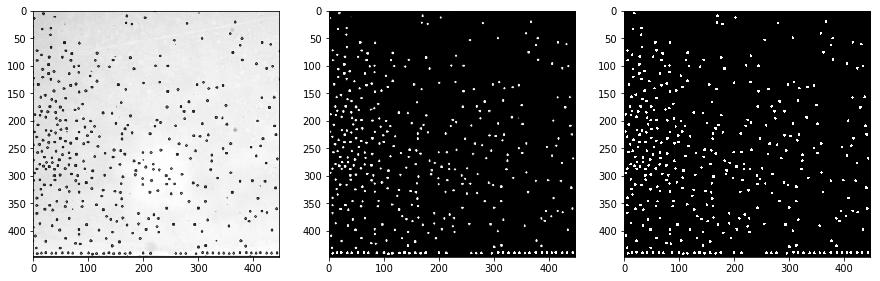

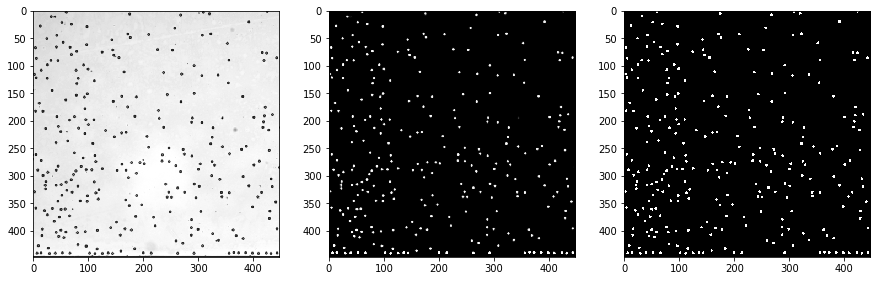

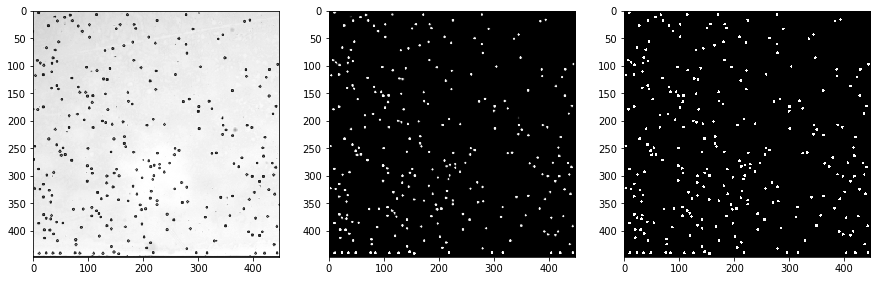

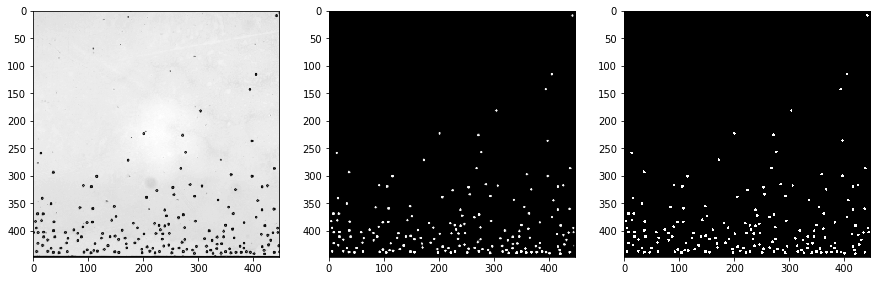

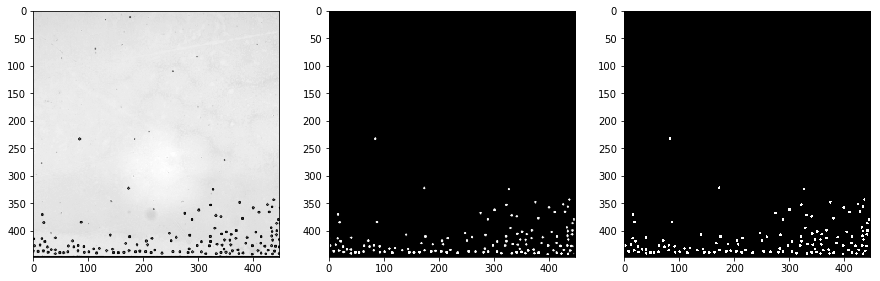

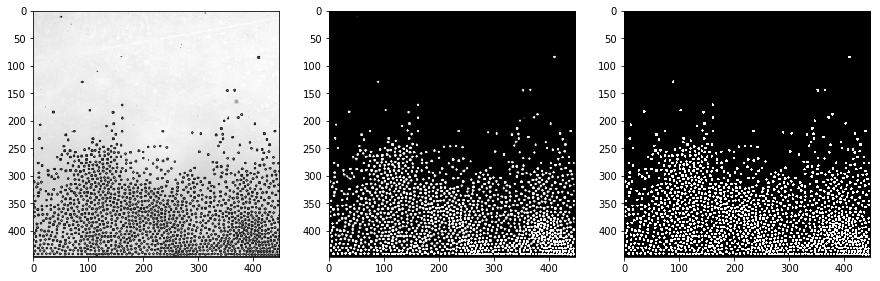

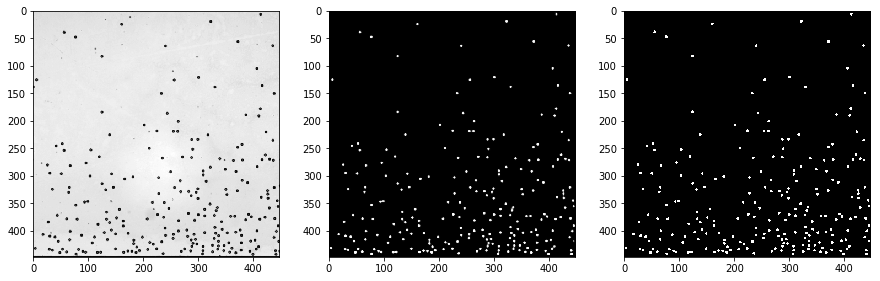

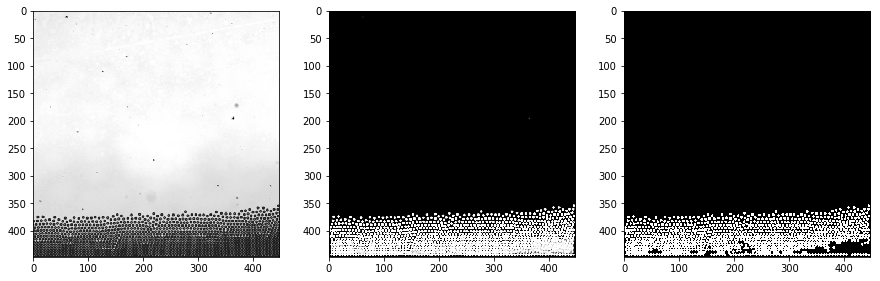

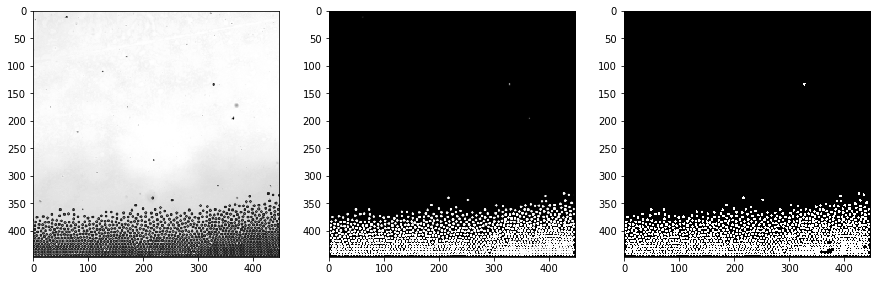

In [41]:
data_paths = ["/l/projects/data/AM2018_MIXED/0deg_-100V/",
             "/l/projects/data/AM2018_MIXED/0deg_-110V/",
             "/l/projects/data/AM2018_MIXED/0deg_-120V/",
             "/l/projects/data/AM2018_MIXED/30deg_-100V/",
             "/l/projects/data/AM2018_MIXED/60deg_-100V/",
             "/l/projects/data/AM2018_MIXED/60deg_-105V/",
             "/l/projects/data/AM2018_MIXED/60deg_-120V/",
             "/l/projects/data/AM2018_MIXED/60deg_-85V/",
              "/l/projects/data/AM2018_MIXED/60deg_-95V/",
             ]

paths = data_paths
plt.figure(figsize=(40, 30))

for i, path in enumerate(paths):
    data = AM2018MixedGenerator([path, ], (ih, iw, ic), (ih, iw, icl))
    gen = data.iterator(structure='pair', labeled=True, cropped=False)
    
    x, y = next(gen)
    x, y = x[np.newaxis], y[np.newaxis]
    abstract_model.reset_states()
    yp = abstract_model.predict(x[np.newaxis])
    
    compare_pair((x, yp, y), labeled=False) # inflate by batch size

# Classification Model

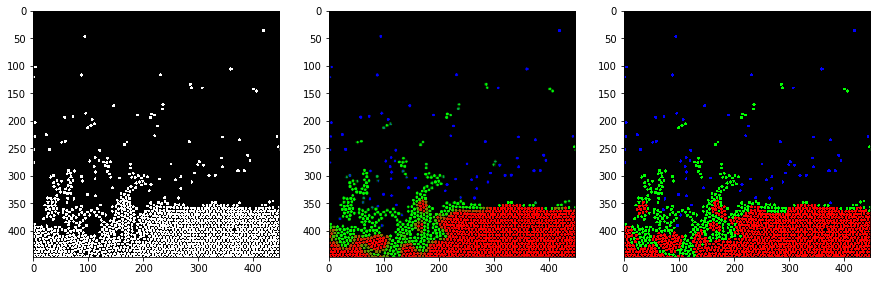

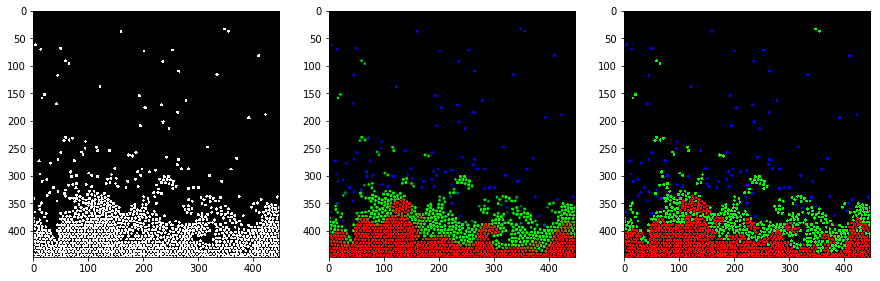

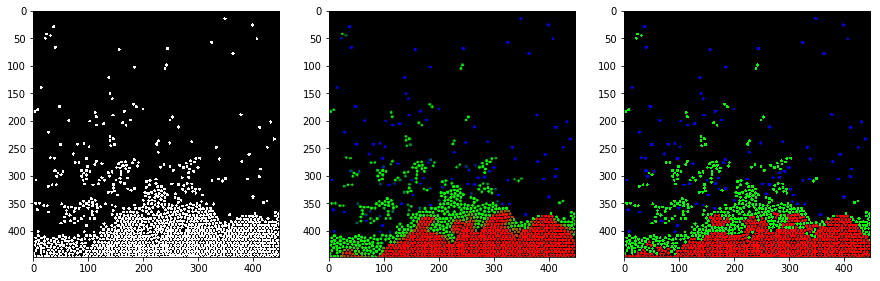

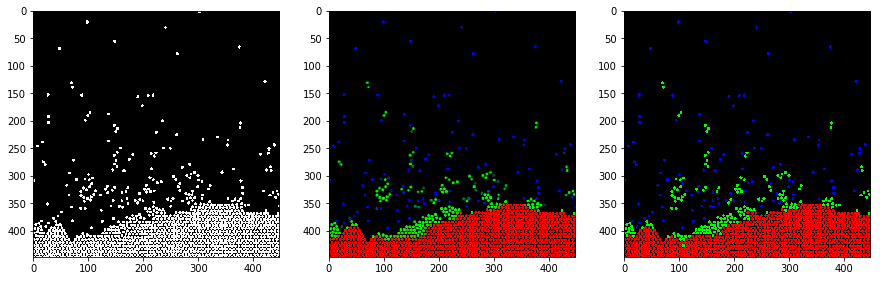

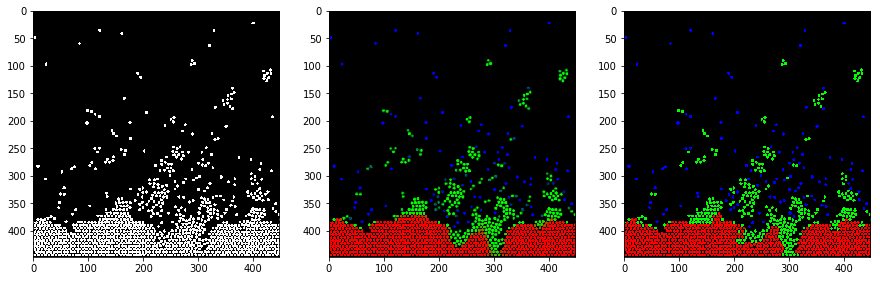

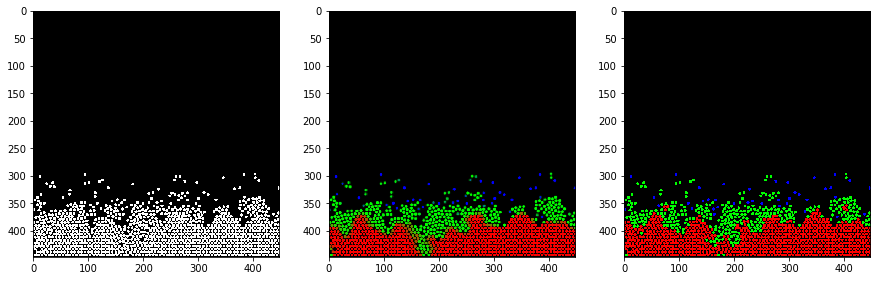

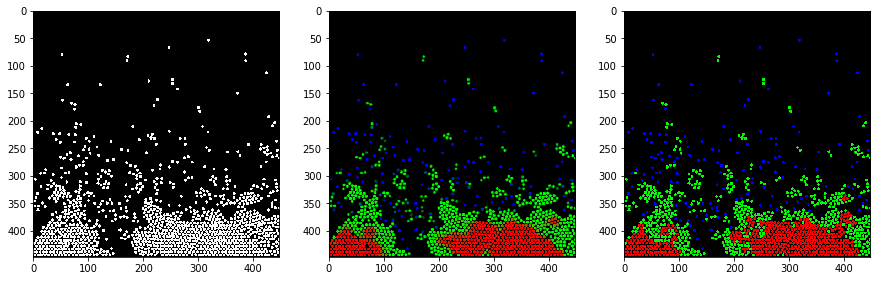

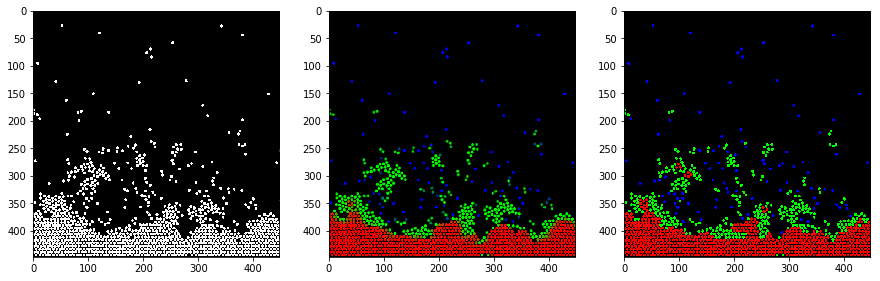

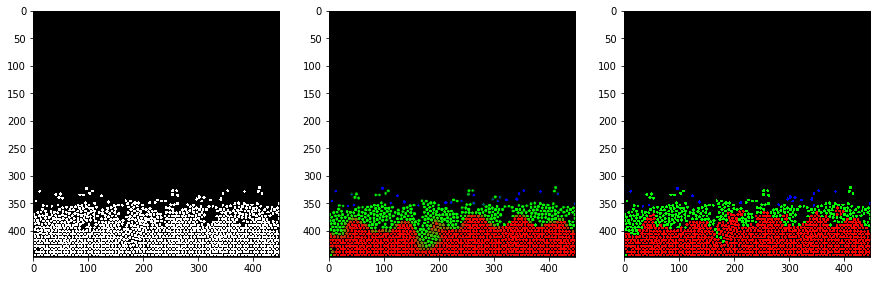

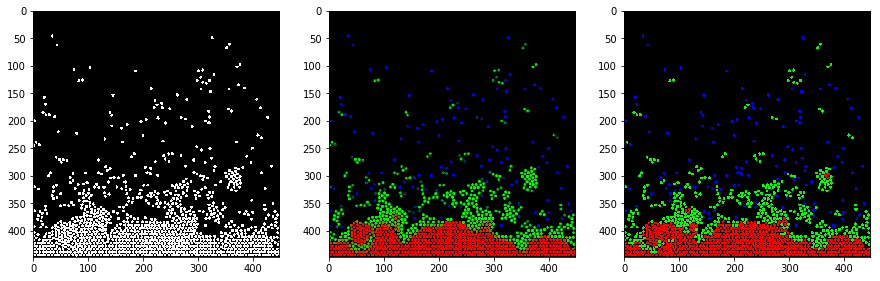

In [42]:
data_paths = ["/l/projects/data/AM2018_SIMULATION/2700/tau_20_var_150",
        "/l/projects/data/AM2018_SIMULATION/2700/tau_20_var_200",
        "/l/projects/data/AM2018_SIMULATION/2700/tau_50_var_120",
        "/l/projects/data/AM2018_SIMULATION/2700/tau_50_var_150",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_20_var_120",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_20_var_150",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_20_var_180",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_50_var_100",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_50_var_120",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_50_var_150"]

for i, path in enumerate(data_paths):
    data = AM2018TxtGenerator([path, ], (lh, lw, lc), (lh, lw, lcl))
    gen = data.iterator(structure='pair', labeled=True, cropped=False)
    
    x, y = next(gen)
    x, y = x[np.newaxis], y[np.newaxis]
    
    classify_model.reset_states()
    yp = classify_model.predict(x[np.newaxis])
    compare_pair((x, yp, y), labeled=True)

# Abstraction + Classification Model

In [59]:
pipeline_model = Model(abstract_model.inputs, classify_model(abstract_model(abstract_model.inputs)))
len_sequence = 10

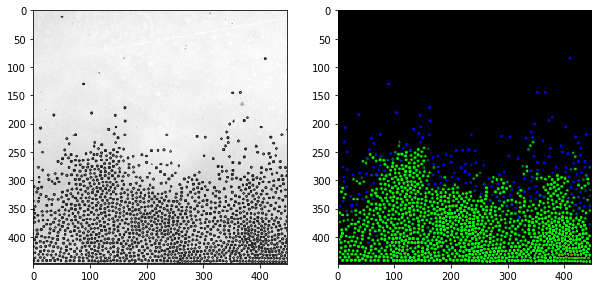

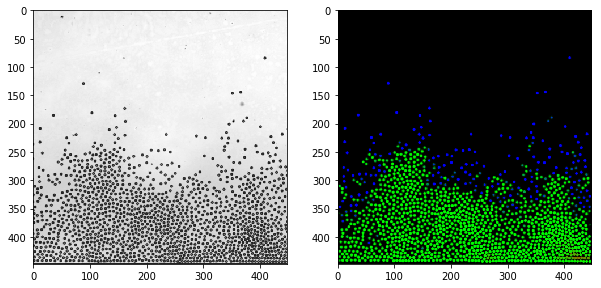

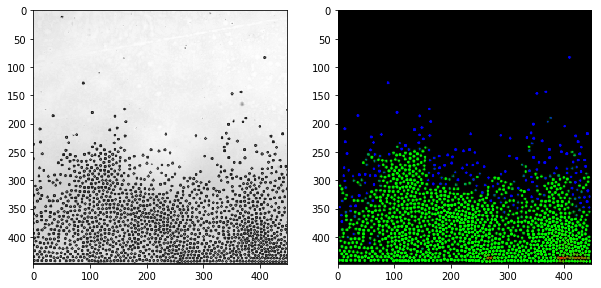

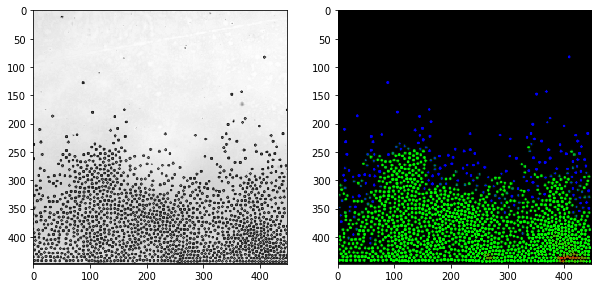

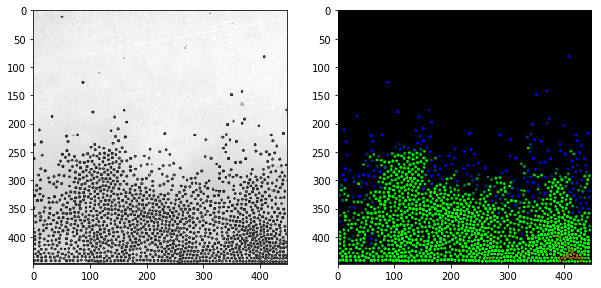

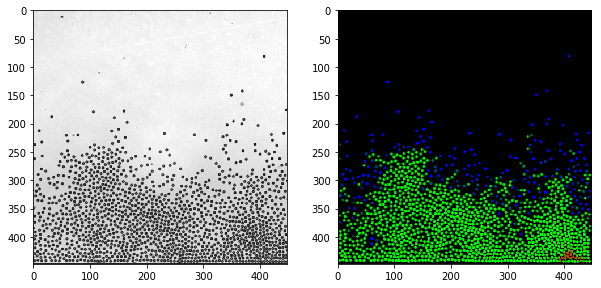

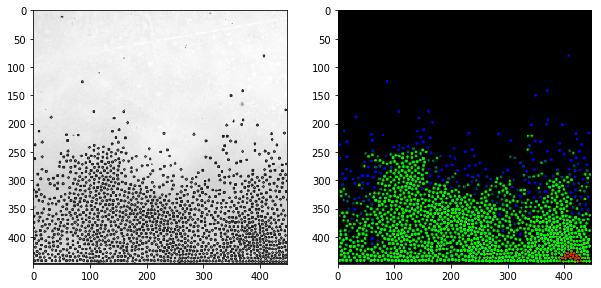

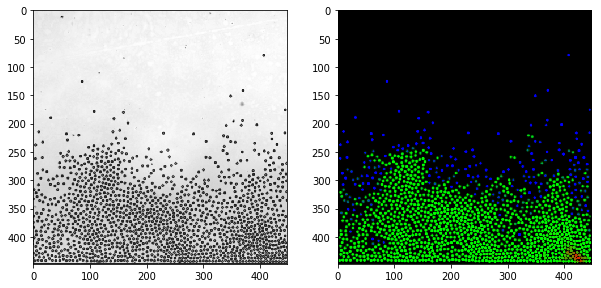

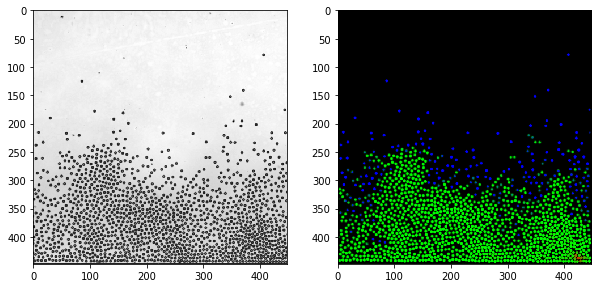

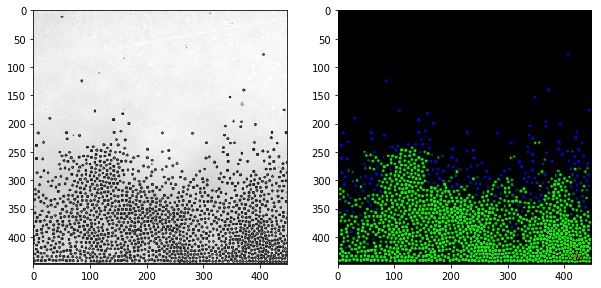

In [60]:
data_path = "/l/projects/data/AM2018_MIXED/60deg_-105V/"

data = AM2018MixedGenerator([data_path, ], (ih, iw, ic), (ih, iw, icl))
gen = data.iterator(structure='pair', labeled=True, cropped=False)

pipeline_model.reset_states()
for i in range(len_sequence):
    x, y = next(gen)
    x, y = x[np.newaxis], y[np.newaxis]
    
    yp = pipeline_model.predict(x[np.newaxis])    
    show_pair((x, yp), labeled=True)

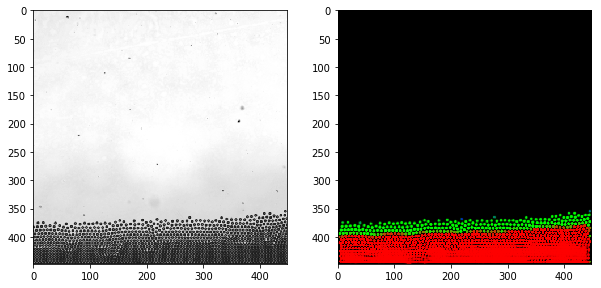

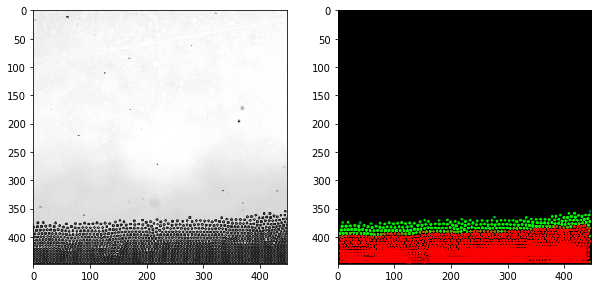

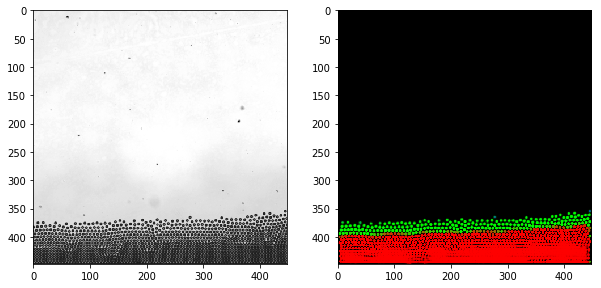

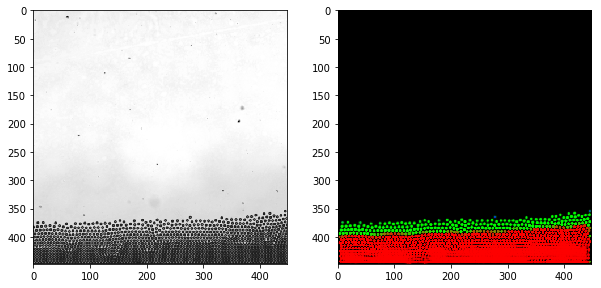

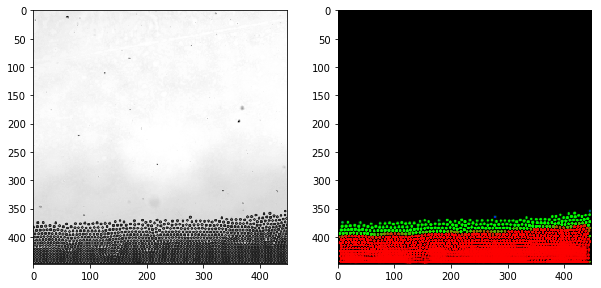

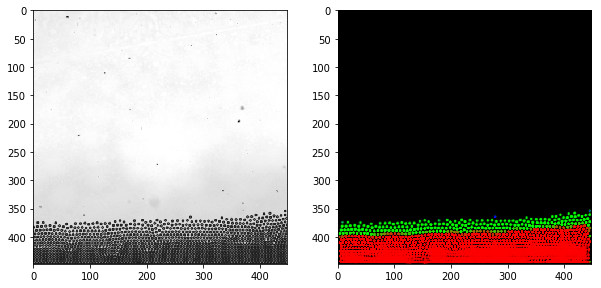

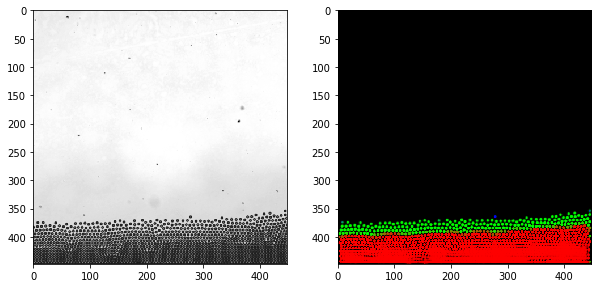

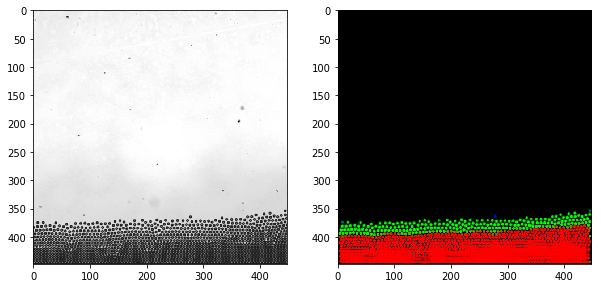

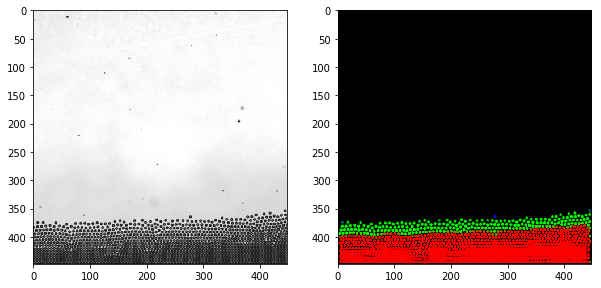

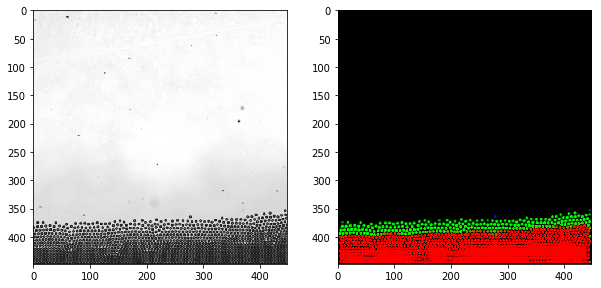

In [61]:
data_path = "/l/projects/data/AM2018_MIXED/60deg_-85V/"

data = AM2018MixedGenerator([data_path, ], (ih, iw, ic), (ih, iw, icl))
gen = data.iterator(structure='pair', labeled=True, cropped=False)

pipeline_model.reset_states()
for i in range(len_sequence):
    x, y = next(gen)
    x, y = x[np.newaxis], y[np.newaxis]
    
    yp = pipeline_model.predict(x[np.newaxis])    
    show_pair((x, yp), labeled=True)

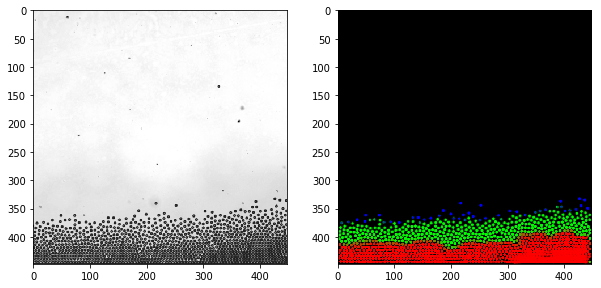

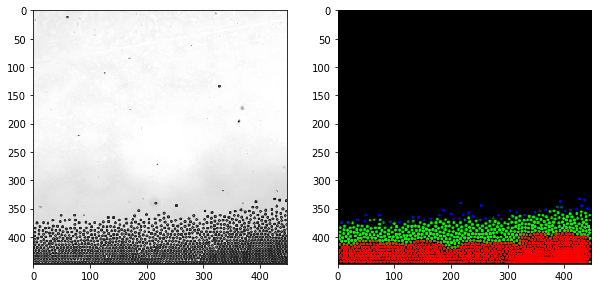

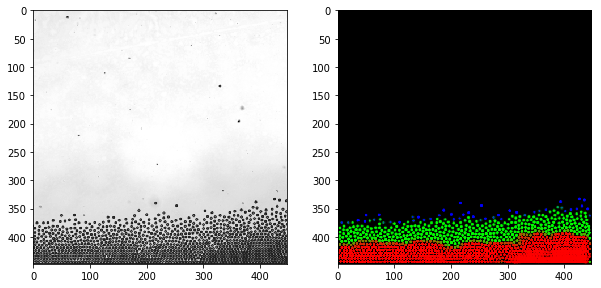

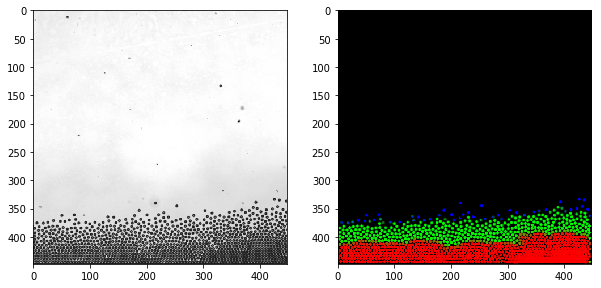

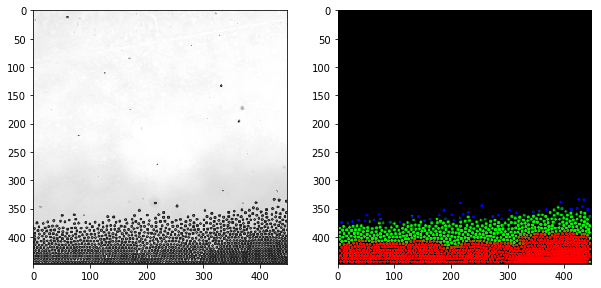

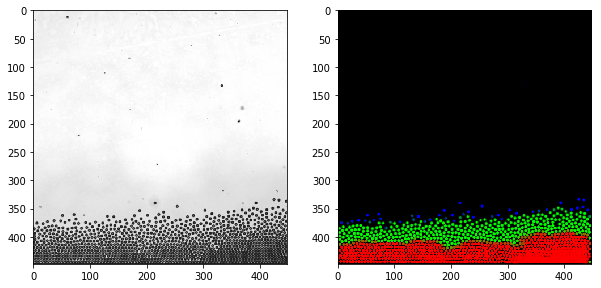

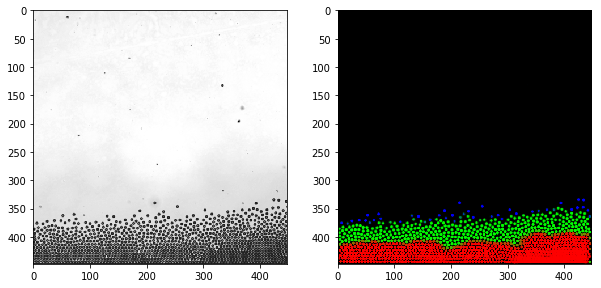

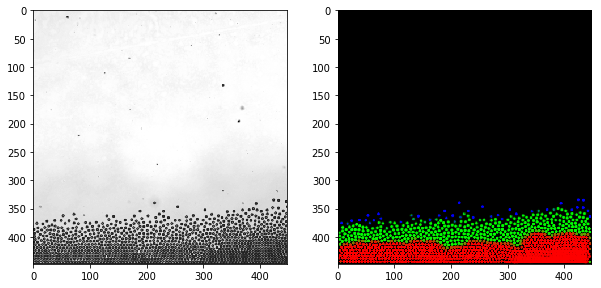

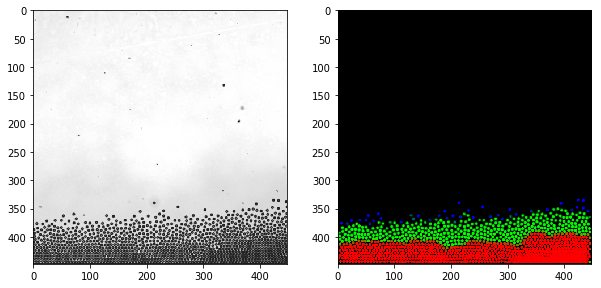

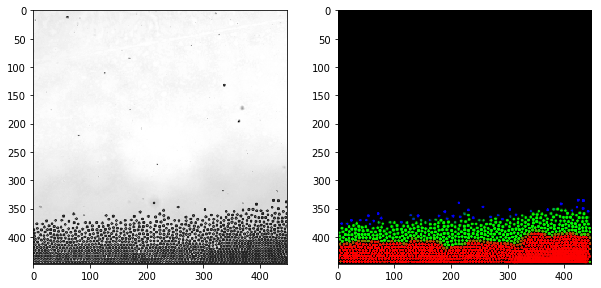

In [62]:
data_path = "/l/projects/data/AM2018_MIXED/60deg_-95V/"

data = AM2018MixedGenerator([data_path, ], (ih, iw, ic), (ih, iw, icl))
gen = data.iterator(structure='pair', labeled=True, cropped=False)

pipeline_model.reset_states()
for i in range(len_sequence):
    x, y = next(gen)
    x, y = x[np.newaxis], y[np.newaxis]
    
    yp = pipeline_model.predict(x[np.newaxis])    
    show_pair((x, yp), labeled=True)